# Observation:
    The higher the latitude of a city the lower the temperature.
    The huminity isn't depend on a latitude of a city.
    The wind speed from most city ranges from 1 to 15 mph.
    
    

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

#create lists 
lat = []
lng = []
temp = []
humidity = []
clouds = []
wind_speed = []
date = []
country = []
city_list = []

print("---------------------")

for city in cities:
    query_url = url + "&q=" + city
    
    #parse out the information in json
    weather_json = requests.get(query_url).json()

    #wrap it in a try: except: in case there are missing info for some cities
    try:
        #append info to list 
        lat.append(weather_json["coord"]["lat"])
    except: 
        #if there is missing info, add a nan value
        lat.append(np.nan)
        
    try:
        lng.append(weather_json["coord"]["lon"])
    except:
        lng.append(np.nan)
        
    try:
        temp.append(weather_json["main"]["temp"])
    except:
        temp.append(np.nan)
        
    try:
        humidity.append(weather_json["main"]["humidity"])
    except:
        humidity.append(np.nan)
        
    try:
        clouds.append(weather_json["clouds"]["all"])
    except:
        clouds.append(np.nan)
        
    try:
        wind_speed.append(weather_json["wind"]["speed"])
    except:
        wind_speed.append(np.nan)
    
    try:
        date.append(weather_json["dt"])
    except:
        date.append(np.nan)
        
    try:
        country.append(weather_json["sys"]["country"])
    except:
        country.append(np.nan)
        
    try:
        city_list.append(weather_json["name"])
    except:
        city_list.append(np.nan)
    
    #print processing log
    try:
        city_name = weather_json["name"]
        city_id = weather_json["id"]

        print("Processing " + city_name + " | City ID: " + str(city_id))
        print(query_url)
    except KeyError: 
        print("Skipping.. no city information")

print("====================================================")




---------------------
Processing Ambon | City ID: 3037899
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=ambon
Processing Havre-Saint-Pierre | City ID: 5972291
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=havre-saint-pierre
Processing Busselton | City ID: 2075265
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=busselton
Skipping.. no city information
Processing Khatanga | City ID: 2022572
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=khatanga
Processing Port Lincoln | City ID: 2063036
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=port lincoln
Processing Karratha | City ID: 6620339
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=karratha
Processing Severo

Processing Atuona | City ID: 4020109
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=atuona
Processing Villa Bruzual | City ID: 3625346
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=villa bruzual
Processing Polson | City ID: 5671996
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=polson
Processing Esperance | City ID: 3573739
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=esperance
Processing Matamoros | City ID: 3523466
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=matamoros
Processing Pevek | City ID: 2122090
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=pevek
Processing Alofi | City ID: 4036284
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing Saint-Francois | City ID: 2980080
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=saint-francois
Processing Tasiilaq | City ID: 3424607
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=tasiilaq
Processing Kerman | City ID: 128234
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=kerman
Processing Ilhabela | City ID: 3461425
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=ilhabela
Processing Bredasdorp | City ID: 1015776
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=bredasdorp
Processing Korem | City ID: 332746
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=korem
Processing Lavrentiya | City ID: 4031637
http://api.openweathermap.org/data/2.5/weather?un

Skipping.. no city information
Processing Samarai | City ID: 2132606
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=samarai
Processing Manokwari | City ID: 1636308
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=manokwari
Processing Voykove | City ID: 688904
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=voykove
Processing Chene-Bougeries | City ID: 3209498
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=chene-bougeries
Processing Dubbo | City ID: 2168305
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=dubbo
Processing Polyarnyy | City ID: 506763
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=polyarnyy
Processing Flin Flon | City ID: 5954718
http://api.openwe

Processing Cherskiy | City ID: 2126199
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=cherskiy
Processing Maragogi | City ID: 3395458
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=maragogi
Processing Mangrol | City ID: 1263751
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=mangrol
Skipping.. no city information
Processing Krasnyy Chikoy | City ID: 2012349
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=krasnyy chikoy
Processing Tieli | City ID: 2034440
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=tieli
Processing Bathsheba | City ID: 3374083
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=bathsheba
Processing Hamilton | City ID: 3573197
http://api.openwea

Processing Wagar | City ID: 4069458
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=wagar
Skipping.. no city information
Processing Salalah | City ID: 286621
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=salalah
Processing Rozkishne | City ID: 705104
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=rozkishne
Processing Mecca | City ID: 104515
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=mecca
Processing Lipin Bor | City ID: 535113
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=lipin bor
Processing Pamyat Parizhskoy Kommuny | City ID: 512947
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=pamyat parizhskoy kommuny
Processing Farafangana | City ID: 1065158
ht

Processing Chatham | City ID: 5920450
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=chatham
Processing Troitsko-Pechorsk | City ID: 481548
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=troitsko-pechorsk
Processing Mahibadhoo | City ID: 1337605
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=mahibadhoo
Processing Port Blair | City ID: 1259385
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=port blair
Processing Vallenar | City ID: 3868633
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=vallenar
Processing Tuatapere | City ID: 2180815
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=tuatapere
Processing Ribeira Grande | City ID: 3372707
http://api.openweatherma

Processing Gotsu | City ID: 1863521
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=gotsu
Processing Rylsk | City ID: 695019
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=rylsk
Skipping.. no city information
Processing Keuruu | City ID: 652977
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=keuruu
Processing Teyateyaneng | City ID: 932035
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=teyateyaneng
Processing Parana | City ID: 3663516
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=parana
Processing Te Anau | City ID: 2181625
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=te anau
Processing Peniche | City ID: 2264923
http://api.openweathermap.org/data/2.5/wea

Processing Inyonga | City ID: 159134
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=inyonga
Processing Burnie | City ID: 2173125
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=burnie
Processing Bonham | City ID: 4675577
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=bonham
Processing Sasebo | City ID: 1852899
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=sasebo
Skipping.. no city information
Processing Kaeo | City ID: 2189343
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=kaeo
Processing Pilar | City ID: 3427208
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=pilar
Processing Rocha | City ID: 3440777
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Taft | City ID: 1684659
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=taft
Skipping.. no city information
Processing Tshane | City ID: 933726
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=tshane
Skipping.. no city information
Processing Pitimbu | City ID: 3391889
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=pitimbu
Processing Watsa | City ID: 204283
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=watsa
Skipping.. no city information
Processing Cap Malheureux | City ID: 934649
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=cap malheureux
Processing Zhangjiakou | City ID: 2033196
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=zhangjiakou
Proces

Processing Lethem | City ID: 3379316
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=lethem
Processing Plouzane | City ID: 2986626
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=plouzane
Processing Cabadiangan | City ID: 1717512
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=cabadiangan
Processing Rawson | City ID: 3839307
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=rawson
Processing Alihe | City ID: 2038665
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=alihe
Processing Saraland | City ID: 4088628
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1e94e6ea471d628680b201f997544e9&q=saraland
Skipping.. no city information
Processing Pareora | City ID: 2181133
http://api.openweathermap.org/dat

In [4]:
#print it out to see where the required info is located
#print(json.dumps(weather_json,indent=4))

In [5]:
#build data frame
weather_df = pd.DataFrame()
weather_df["City"] = city_list
weather_df["Country"] = country
weather_df["Date"] = date
weather_df["Latitude"] = lat
weather_df["Longitude"] = lng
weather_df["Temperature"] = temp
weather_df["Humidity"] = humidity
weather_df["Cloudiness"] = clouds
weather_df["Wind Speed"] = wind_speed
weather_df.head()


,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Ambon,FR,1.537826e+09,47.55,-2.56,51.80,66.0,0.0,8.05
1,Havre-Saint-Pierre,CA,1.537826e+09,50.23,-63.60,42.80,45.0,40.0,6.93
2,Busselton,AU,1.537828e+09,-33.64,115.35,58.95,100.0,12.0,13.67
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Khatanga,RU,1.537828e+09,71.98,102.47,35.64,100.0,92.0,20.83


In [7]:
#drop nan values in data frame (axis=0 --> dropping rows) (how="any" --> drop the whole row if there is a nan value)
cleaned_weather_df = weather_df.dropna(axis=0,how="any")

#reset index
cleaned_weather_df = cleaned_weather_df.reset_index()

#drop "index" column created while resetting index
new_weather_df = cleaned_weather_df[["City", 
                                     "Country", 
                                     "Date", 
                                     "Latitude", 
                                     "Longitude",
                                     "Temperature", 
                                     "Humidity", 
                                     "Cloudiness", 
                                     "Wind Speed"]]

#format so that date is not displayed in scientific form
pd.options.display.float_format = '{:.2f}'.format

#save to csv
#new_weather_df.to_csv("../output_data/cities.csv")

#visualize data frame 
new_weather_df.head(10)

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Ambon,FR,1537826400.00,47.55,-2.56,51.80,66.00,0.00,8.05
1,Havre-Saint-Pierre,CA,1537826400.00,50.23,-63.60,42.80,45.00,40.00,6.93
2,Busselton,AU,1537827759.00,-33.64,115.35,58.95,100.00,12.00,13.67
3,Khatanga,RU,1537827759.00,71.98,102.47,35.64,100.00,92.00,20.83
4,Port Lincoln,AU,1537827759.00,-34.72,135.86,52.02,100.00,0.00,12.55
5,Karratha,AU,1537827760.00,-20.74,116.85,69.93,28.00,0.00,10.98
6,Severo-Kurilsk,RU,1537827649.00,50.68,156.12,50.04,97.00,92.00,14.67
7,Hobart,AU,1537826400.00,-42.88,147.33,46.40,65.00,75.00,9.17
8,Ushuaia,AR,1537822800.00,-54.81,-68.31,41.00,65.00,40.00,18.34
9,Rikitea,PF,1537827633.00,-23.12,-134.97,68.85,100.00,24.00,16.91


In [15]:
#convert unix timestamp to date
date = time.ctime(new_weather_df["Date"][0])
#print(date)

#set variables for plot attributes 
color = "salmon"
edgecolor = "black"
alpha = 1

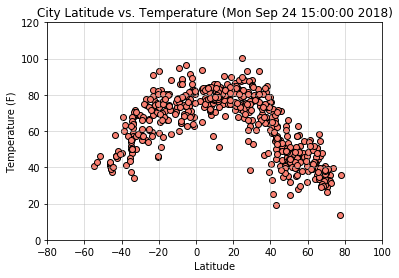

In [9]:
plt.scatter(
    new_weather_df["Latitude"],
    new_weather_df["Temperature"], 
    facecolor=color,
    edgecolor=edgecolor,
    alpha=alpha)
plt.ylim(0,120)
plt.xlim(-80,100)
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(alpha=0.5)

#save plot to fig
plt.savefig("../Images/temperature.png")

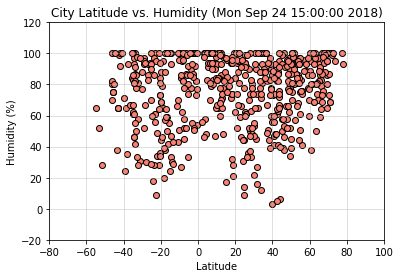

In [10]:
plt.scatter(
    new_weather_df["Latitude"],
    new_weather_df["Humidity"], 
    facecolor=color, 
    edgecolor=edgecolor,
    alpha=alpha)
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid(alpha=0.5)
plt.savefig("../Images/humidity.png")

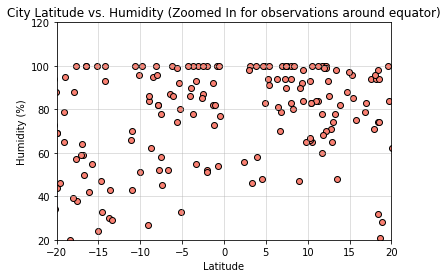

In [11]:
#zooming into part of the plot for observations
plt.scatter(
    new_weather_df["Latitude"],
    new_weather_df["Humidity"], 
    facecolor=color, 
    edgecolor=edgecolor,
    alpha=alpha)
plt.ylim(20,120)
plt.xlim(-20,20)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (Zoomed In for observations around equator)")
plt.grid(alpha=0.5)

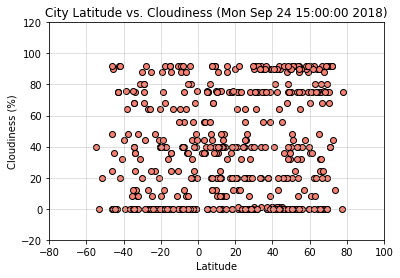

In [12]:
plt.scatter(
    new_weather_df["Latitude"],
    new_weather_df["Cloudiness"], 
    facecolor=color, 
    edgecolor=edgecolor,
    alpha=alpha)
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(alpha=0.5)
plt.savefig("../Images/cloudiness.png")

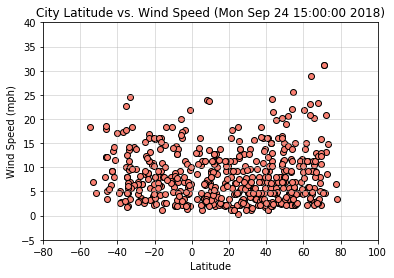

In [13]:
plt.scatter(
    new_weather_df["Latitude"],
    new_weather_df["Wind Speed"],
    facecolor=color,
    edgecolor=edgecolor,
    alpha=alpha)
plt.ylim(-5,40)
plt.xlim(-80,100)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(alpha=0.5)
plt.savefig("../Images/windspeed.png")